In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['cmex10',] # windows->simhei
plt.rcParams['figure.dpi'] = 100

import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns

In [3]:
import os
import platform
if platform.system() == "Windows":
    os.chdir(r'G:\BaiduSyncdisk\MyServices\DR.MENG-Full\Y2024-002-DT-NANJING-ACCESSIBILITY-MAUP')
else:
    os.chdir(r'/Volumes/SANDISK/DR.MENG')

In [4]:
df = pd.read_csv(r"./data_models/model_performance_xgboost_new.csv")

In [5]:
df.head(2)

,name,file_path,num_train,num_test,r2,mse,learning_rate,max_depth,n_estimators
0,df_1,df_1_modeling_od_walk_grid250_od_900.joblib,596,149,-3.482,1.230,0.16,2,67
1,df_1,df_1_modeling_od_walk_grid500_od_900.joblib,947,237,-1.527,2.696,0.09,3,103


In [6]:
df['unit'] = df['file_path'].str.split('_').str.get(5)
df['ts'] = df['file_path'].str.split('_').str.get(7)

In [7]:
df.head(2)

,name,file_path,num_train,num_test,r2,mse,learning_rate,max_depth,n_estimators,unit,ts
0,df_1,df_1_modeling_od_walk_grid250_od_900.joblib,596,149,-3.482,1.230,0.16,2,67,grid250,900.joblib
1,df_1,df_1_modeling_od_walk_grid500_od_900.joblib,947,237,-1.527,2.696,0.09,3,103,grid500,900.joblib


In [8]:
df['unit'] = df['unit'] + '-level'

In [9]:
grid_types_cv = {
    # 'building': 'building-level',
    'grid250-level': 1,
    'grid500-level': 2,
    'grid1000-level': 3,
    'grid1500-level': 4,
    'grid2000-level': 5,
    'grid2500-level': 6,
    'grid3000-level': 7,
    'community-level': 8,
}

In [10]:
grid_types = {v:k for k,v in grid_types_cv.items()}
grid_types

{1: 'grid250-level',
 2: 'grid500-level',
 3: 'grid1000-level',
 4: 'grid1500-level',
 5: 'grid2000-level',
 6: 'grid2500-level',
 7: 'grid3000-level',
 8: 'community-level'}

In [11]:
df['label'] = df['unit'].map(grid_types_cv)

In [12]:
df.head(2)

,name,file_path,num_train,num_test,r2,mse,learning_rate,max_depth,n_estimators,unit,ts,label
0,df_1,df_1_modeling_od_walk_grid250_od_900.joblib,596,149,-3.482,1.230,0.16,2,67,grid250-level,900.joblib,1
1,df_1,df_1_modeling_od_walk_grid500_od_900.joblib,947,237,-1.527,2.696,0.09,3,103,grid500-level,900.joblib,2


# Supplementary materials

In [13]:
dfa = df.copy()

In [14]:
dfa['Num of Parks'] = dfa['name'].str.split('_').str.get(1)
dfa['travel behavior'] = dfa['file_path'].str.split('_').str.get(4)
dfa['travel threshold'] = dfa['ts'].apply(lambda x: int(int(x.split('.')[0])/60))

In [15]:
dfa.columns

Index(['name', 'file_path', 'num_train', 'num_test', 'r2', 'mse',
       'learning_rate', 'max_depth', 'n_estimators', 'unit', 'ts', 'label',
       'Num of Parks', 'travel behavior', 'travel threshold'],
      dtype='object')

In [16]:
dfa = dfa[['unit',  'travel behavior', 'travel threshold', 'Num of Parks', 'num_train', 'num_test', 'r2', 'mse',
       'learning_rate', 'max_depth', 'n_estimators']]

In [17]:
grid_types_cv_final = {
    # 'building': 'building-level',
    'grid250-level':  '250m-level',
    'grid500-level':  '500m-level',
    'grid1000-level': '1000m-level',
    'grid1500-level': '1500m-level',
    'grid2000-level': '2000m-level',
    'grid2500-level': '2500m-level',
    'grid3000-level': '3000m-level',
    'community-level': 'community-level',
}

In [18]:
dfa['unit'] = dfa['unit'].map(grid_types_cv_final)

In [19]:
dfa

,unit,travel behavior,travel threshold,Num of Parks,num_train,num_test,r2,mse,learning_rate,max_depth,n_estimators
0,250m-level,walk,15,1,596,149,-3.482,1.230,0.16,2,67
1,500m-level,walk,15,1,947,237,-1.527,2.696,0.09,3,103
2,1000m-level,walk,15,1,991,248,0.173,4.851,0.04,5,228
3,1500m-level,walk,15,1,1065,267,0.595,3.985,0.04,7,226
4,2000m-level,walk,15,1,1641,411,0.530,7.436,0.12,5,99
...,...,...,...,...,...,...,...,...,...,...,...
251,1500m-level,nav,30,4,4163,1041,0.824,2.044,0.13,9,265
252,2000m-level,nav,30,4,4340,1086,0.868,2.260,0.06,10,286
253,2500m-level,nav,30,4,4601,1151,0.865,2.435,0.10,7,270
254,3000m-level,nav,30,4,4242,1061,0.910,1.657,0.12,8,239


In [20]:
dfa.to_excel('./result/model-performaces-tb.xlsx')

## fig

In [21]:
dfb = df.copy()

In [22]:
dfb['unit'] = dfb['unit'].map(grid_types_cv_final)

In [23]:
df1 = dfb[dfb['name'] == 'df_1']
df2 = dfb[dfb['name'] == 'df_2']
df3 = dfb[dfb['name'] == 'df_3']
df4 = dfb[dfb['name'] == 'df_4']

In [24]:
df1.head(1)

,name,file_path,num_train,num_test,r2,mse,learning_rate,max_depth,n_estimators,unit,ts,label
0,df_1,df_1_modeling_od_walk_grid250_od_900.joblib,596,149,-3.482,1.23,0.16,2,67,250m-level,900.joblib,1


In [25]:
len(df1)

64

In [26]:
v_median = df1.groupby(by='unit').median()['r2']
v_median = v_median.round(3)

In [27]:
v_median.index

Index(['1000m-level', '1500m-level', '2000m-level', '2500m-level',
       '250m-level', '3000m-level', '500m-level', 'community-level'],
      dtype='object', name='unit')

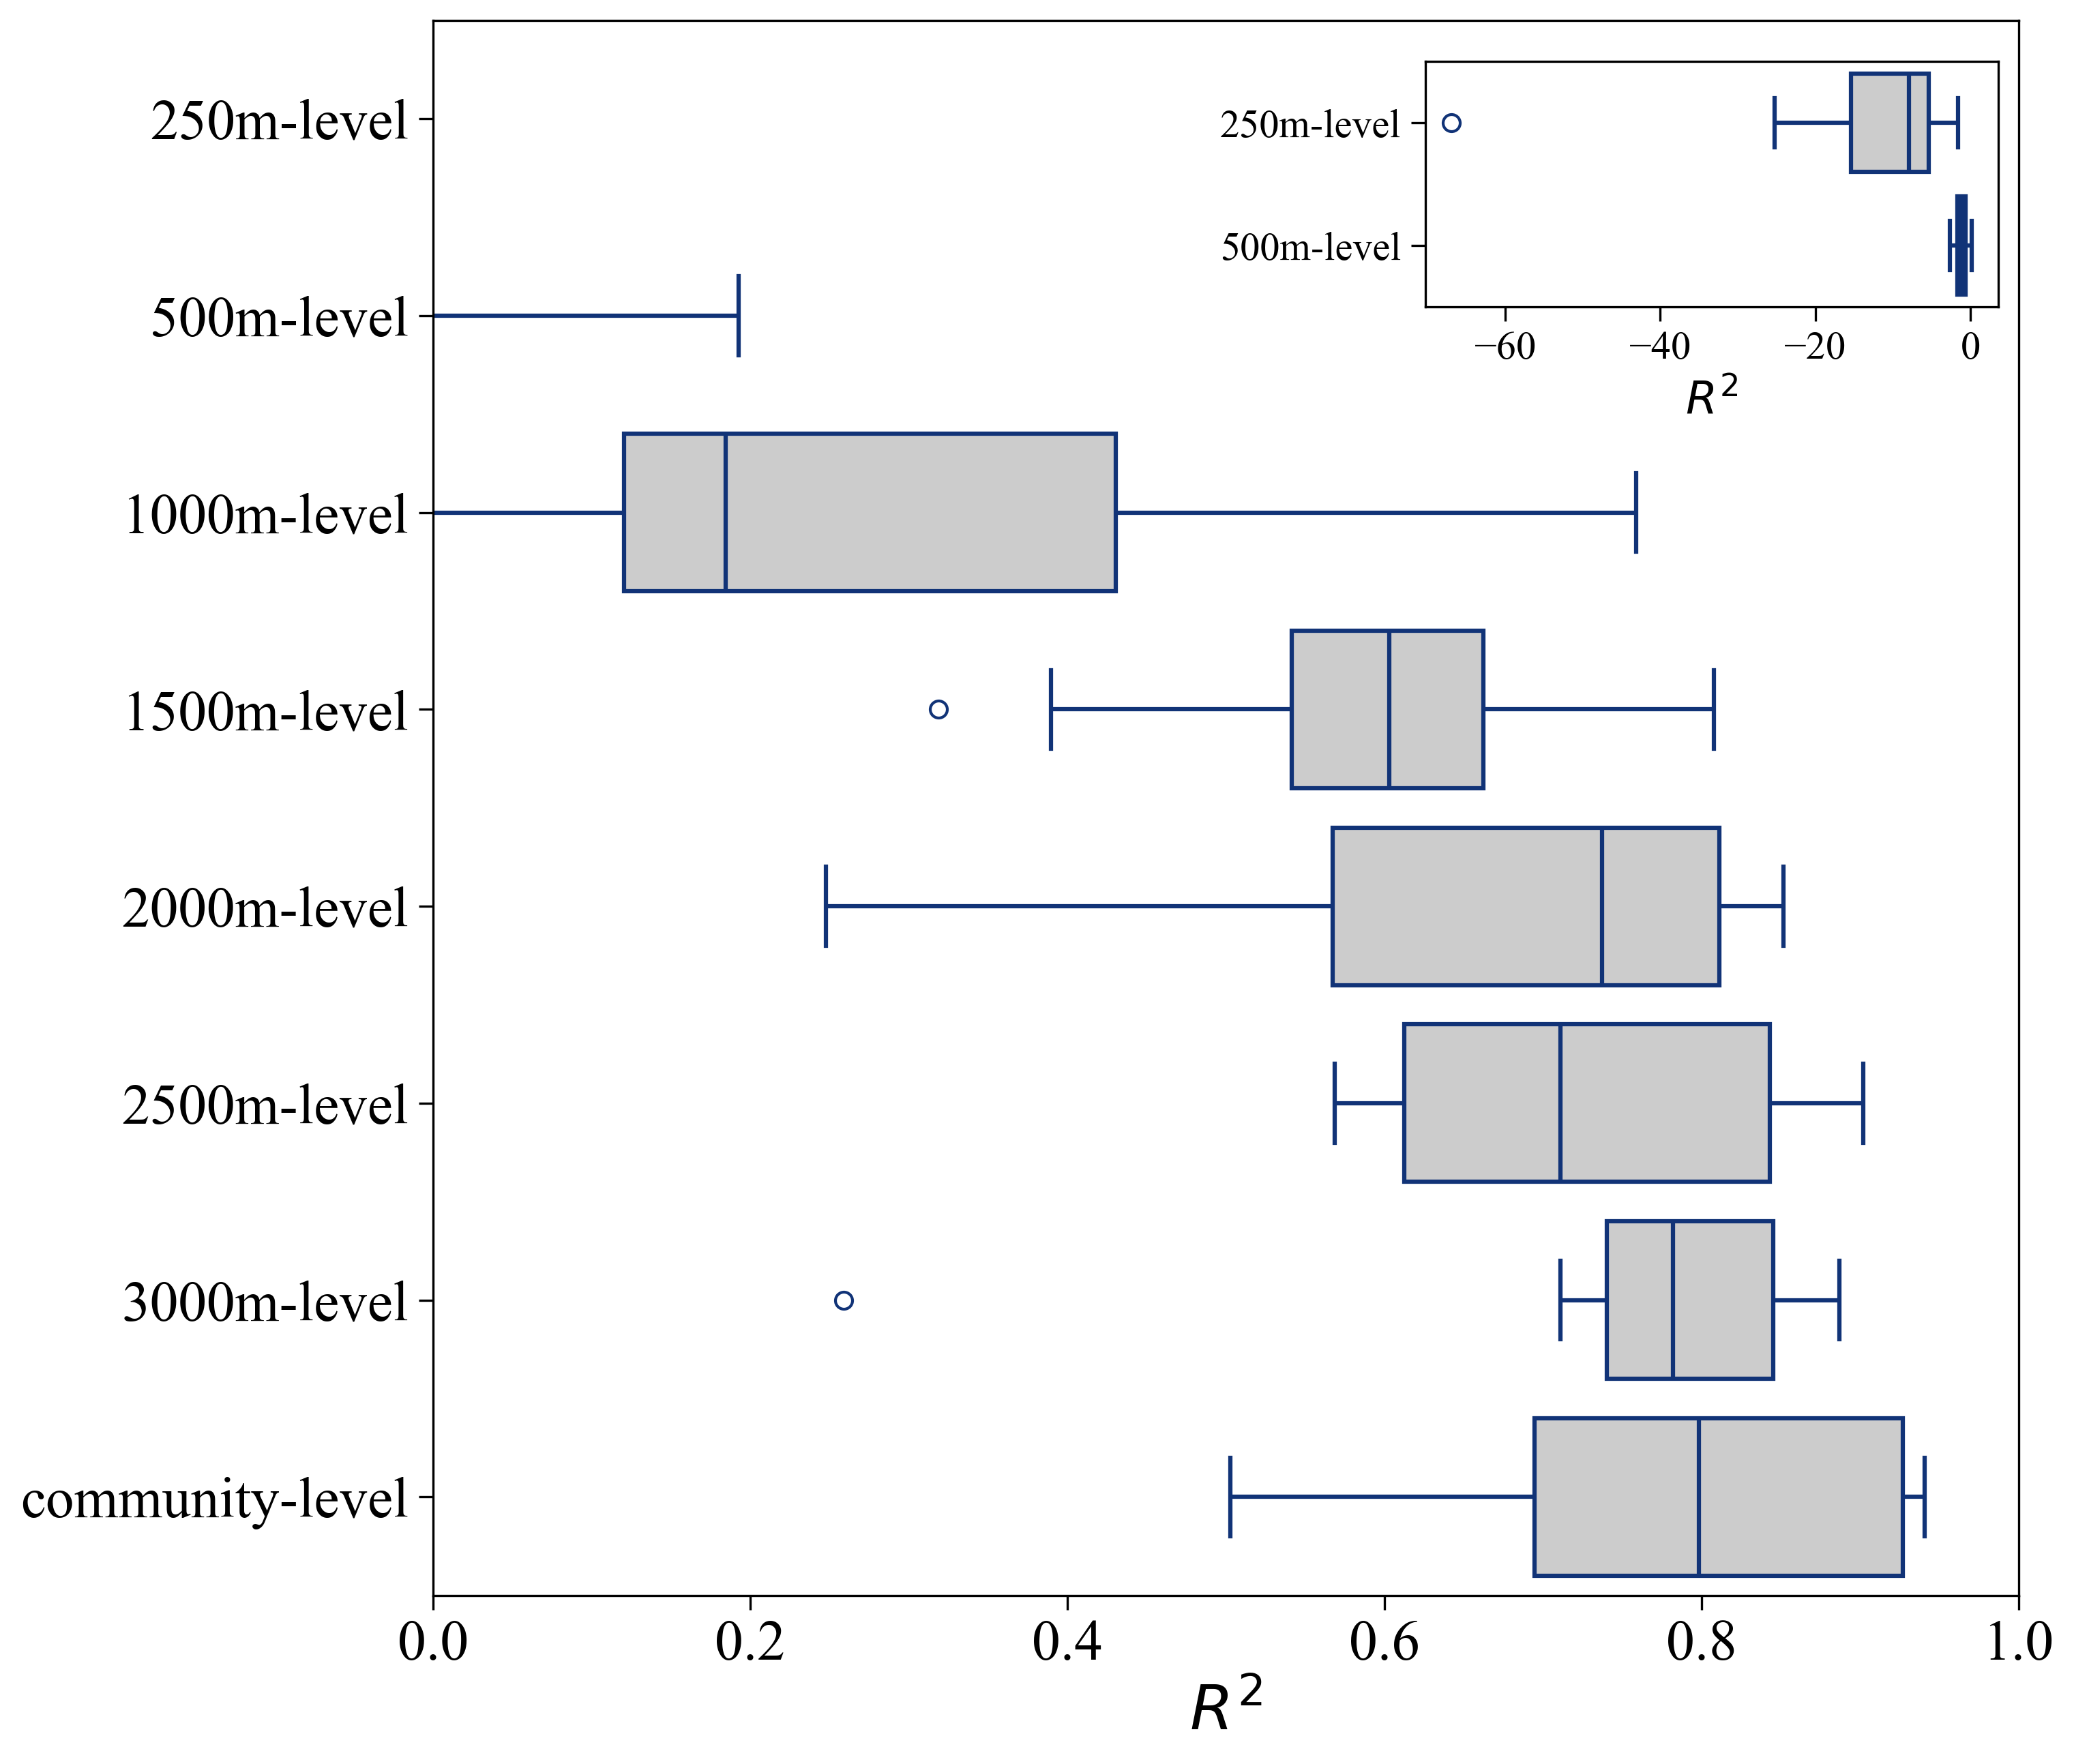

In [28]:
fig, ax = plt.subplots(figsize=(10,10),dpi=300)
sns.boxplot(y=df1['unit'],  x=df1['r2'],color='0.8',linecolor="#137", linewidth=1.5, ax=ax)
ax.set_xlim(0,1)
ax.set_xlabel('$R^2$', fontsize=22)
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', length=5, color='k', labelsize=20)


# v_median = df1.groupby(by='unit').median()['r2']
# v_median = v_median.round(3)
# label_name = ['grid250-level', 'grid500-level', 'grid1000-level', 'grid1500-level',
#               'grid2000-level', 'grid2500-level', 'grid3000-level', 'community-level']
# for i in range(0,8):
#     ax.text(0+0.01,i+0.05, f"Median = {v_median[label_name[i]]}", fontsize=16, ha='left', va='top')
    

ax2 = fig.add_subplot((0.61,0.74,0.28,0.12))
df1x = df1[df1['unit'].isin(['250m-level', '500m-level'])]
sns.boxplot(y=df1x['unit'],  x=df1x['r2'],color='0.8',linecolor="#137", linewidth=1.5, ax=ax2)
ax2.set_xlabel('$R^2$', fontsize=16)
ax2.set_ylabel('')
ax2.tick_params(axis='both', which='major', length=5, color='k', labelsize=14)
plt.savefig(f'./result/png/model-performace/park1.png', dpi=300, bbox_inches='tight')

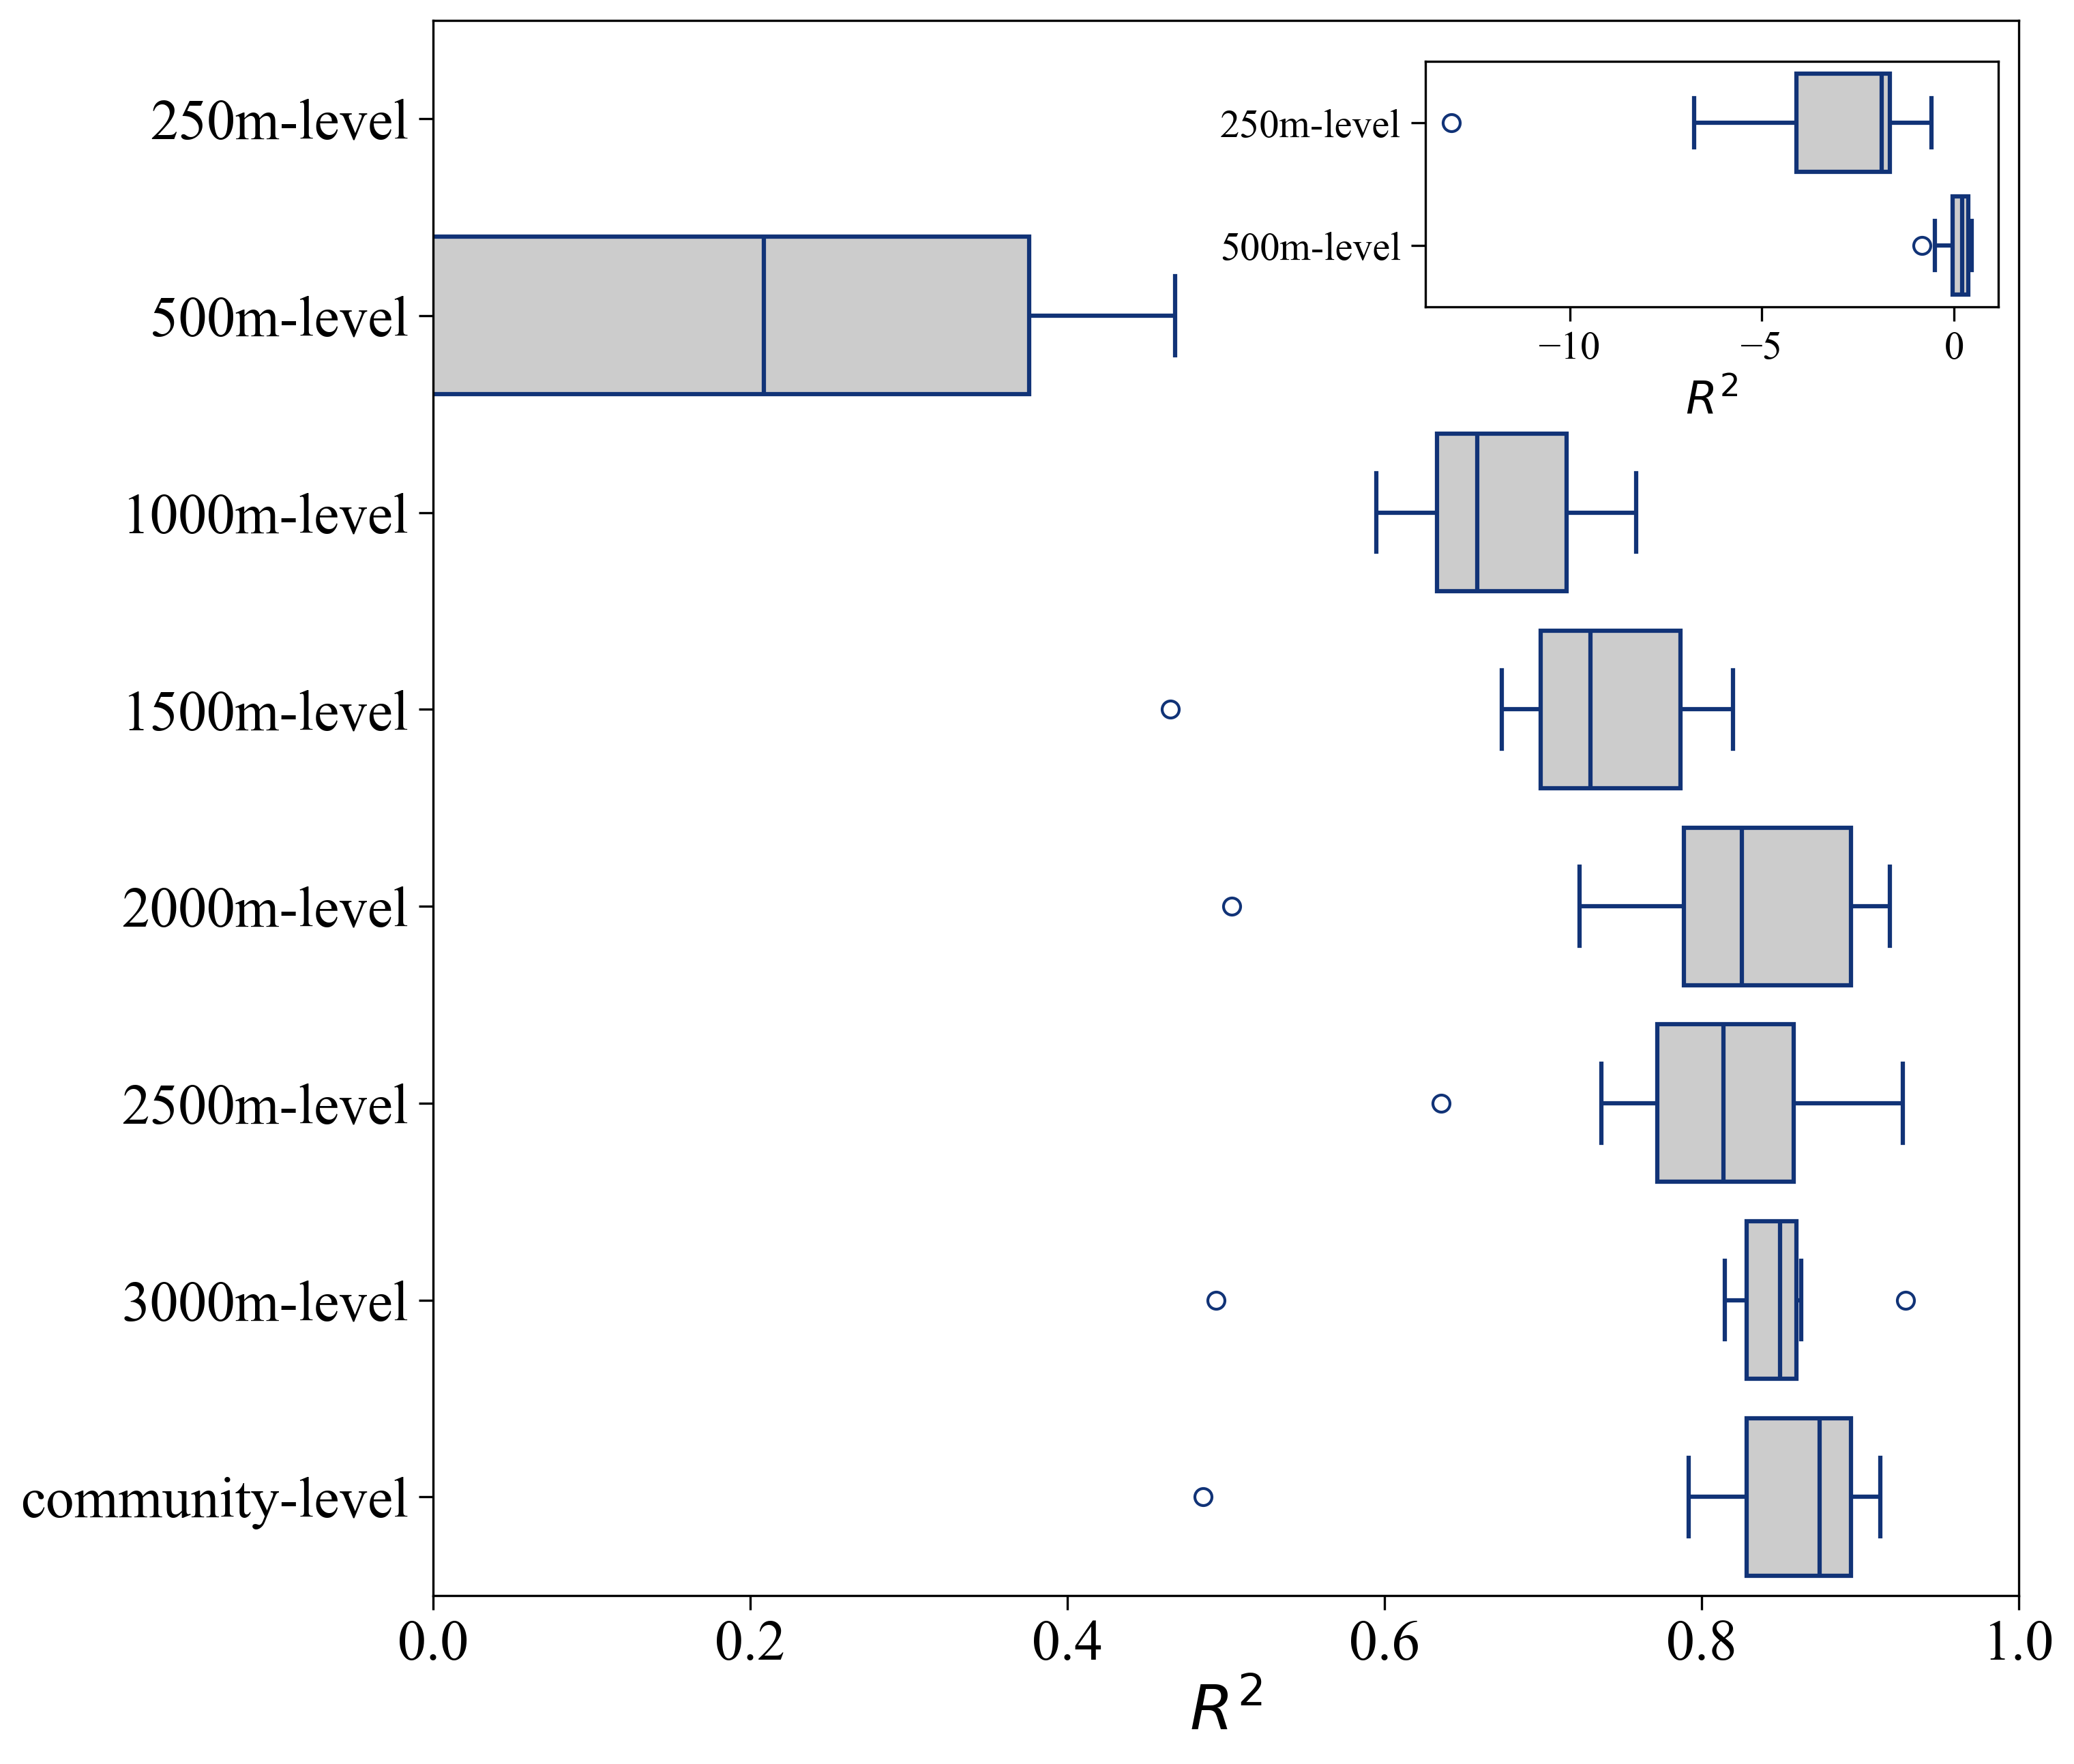

In [29]:
fig, ax = plt.subplots(figsize=(10,10),dpi=300)
sns.boxplot(y=df2['unit'],  x=df2['r2'],color='0.8',linecolor="#137", linewidth=1.5, ax=ax)
ax.set_xlim(0,1)
ax.set_xlabel('$R^2$', fontsize=22)
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', length=5, color='k', labelsize=20)


# v_median = df2.groupby(by='unit').median()['r2']
# v_median = v_median.round(3)
# label_name = ['grid250-level', 'grid500-level', 'grid1000-level', 'grid1500-level',
#               'grid2000-level', 'grid2500-level', 'grid3000-level', 'community-level']
# for i in range(0,8):
#     ax.text(0+0.01,i+0.05, f"Median = {v_median[label_name[i]]}", fontsize=18, ha='left', va='top')
    

ax2 = fig.add_subplot((0.61,0.74,0.28,0.12))
df_sub = df2[df2['unit'].isin(['250m-level', '500m-level'])]
sns.boxplot(y=df_sub['unit'],  x=df_sub['r2'],color='0.8',linecolor="#137", linewidth=1.5, ax=ax2)
ax2.set_xlabel('$R^2$', fontsize=16)
ax2.set_ylabel('')
ax2.tick_params(axis='both', which='major', length=5, color='k', labelsize=14)
plt.savefig(f'./result/png/model-performace/park2.png', dpi=300, bbox_inches='tight')

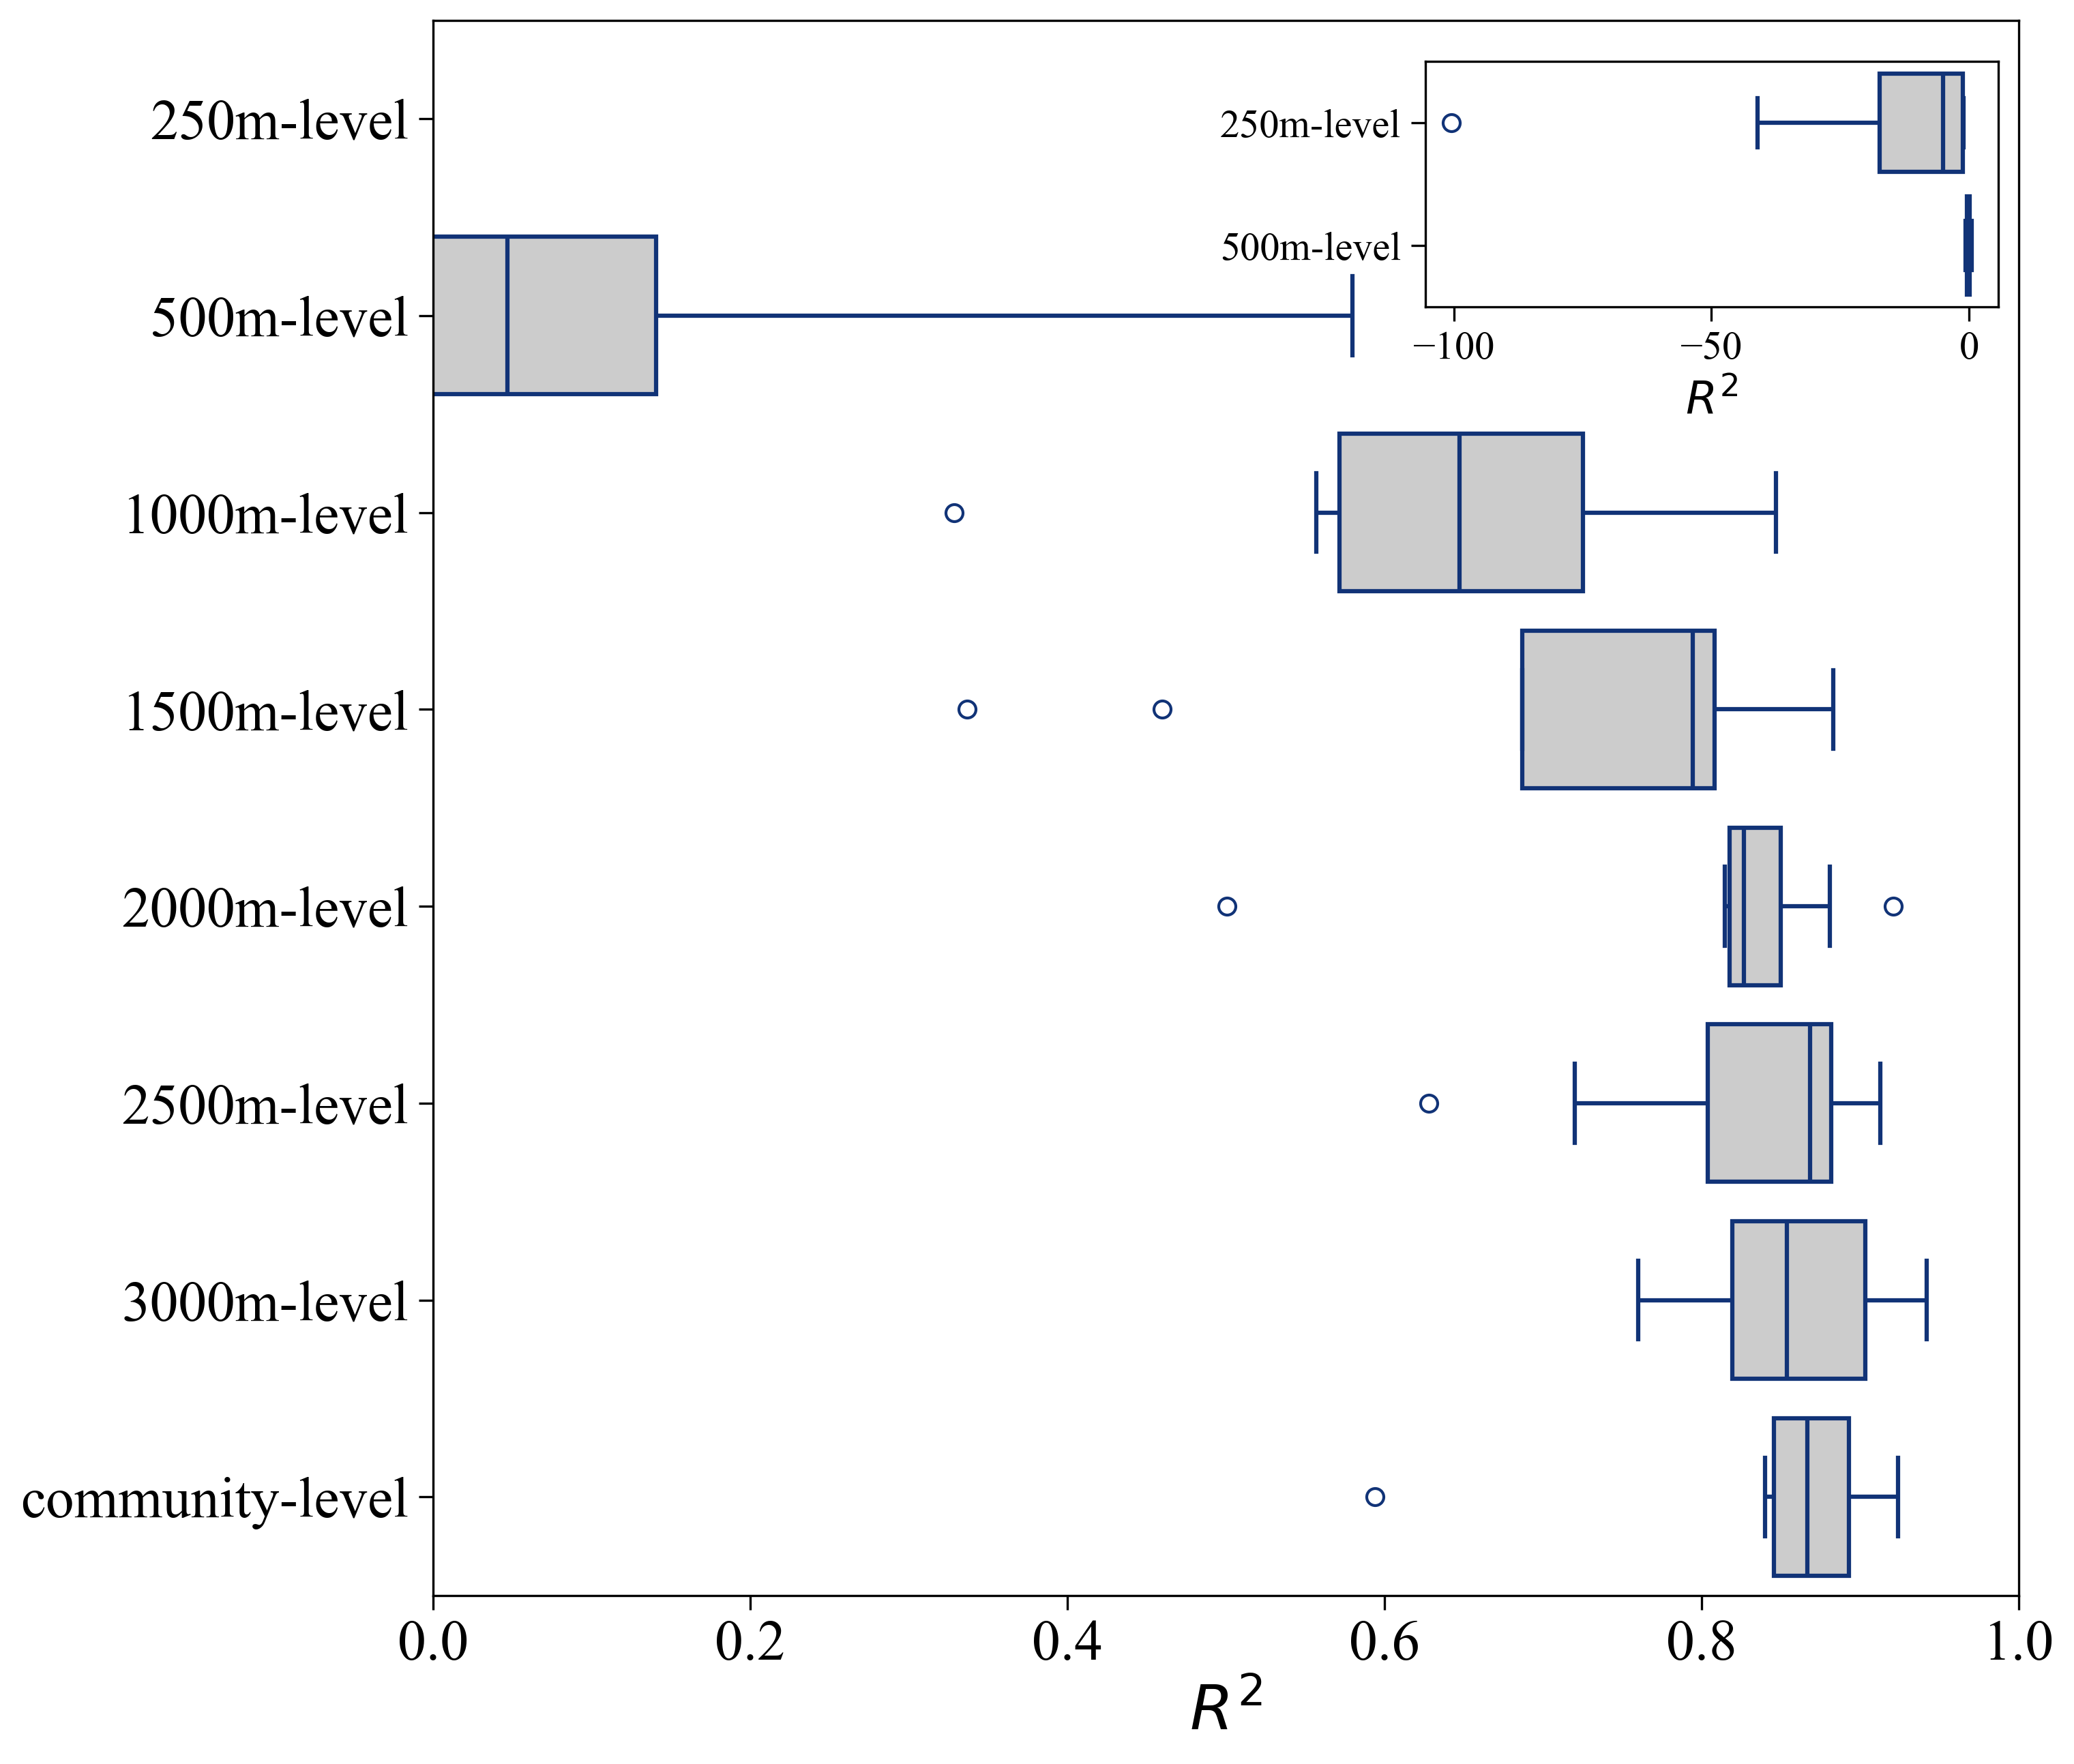

In [30]:
fig, ax = plt.subplots(figsize=(10,10),dpi=300)
sns.boxplot(y=df3['unit'],  x=df3['r2'],color='0.8',linecolor="#137", linewidth=1.5, ax=ax)
ax.set_xlim(0,1)
ax.set_xlabel('$R^2$', fontsize=22)
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', length=5, color='k', labelsize=20)


# v_median = df3.groupby(by='unit').median()['r2']
# v_median = v_median.round(3)
# label_name = ['grid250-level', 'grid500-level', 'grid1000-level', 'grid1500-level',
#               'grid2000-level', 'grid2500-level', 'grid3000-level', 'community-level']
# for i in range(0,8):
#     ax.text(0+0.01,i+0.05, f"Median = {v_median[label_name[i]]}", fontsize=18, ha='left', va='top')
    

ax2 = fig.add_subplot((0.61,0.74,0.28,0.12))
df_sub = df3[df3['unit'].isin(['250m-level', '500m-level'])]
sns.boxplot(y=df_sub['unit'],  x=df_sub['r2'],color='0.8',linecolor="#137", linewidth=1.5, ax=ax2)
ax2.set_xlabel('$R^2$', fontsize=16)
ax2.set_ylabel('')
ax2.tick_params(axis='both', which='major', length=5, color='k', labelsize=14)
plt.savefig(f'./result/png/model-performace/park3.png', dpi=300, bbox_inches='tight')

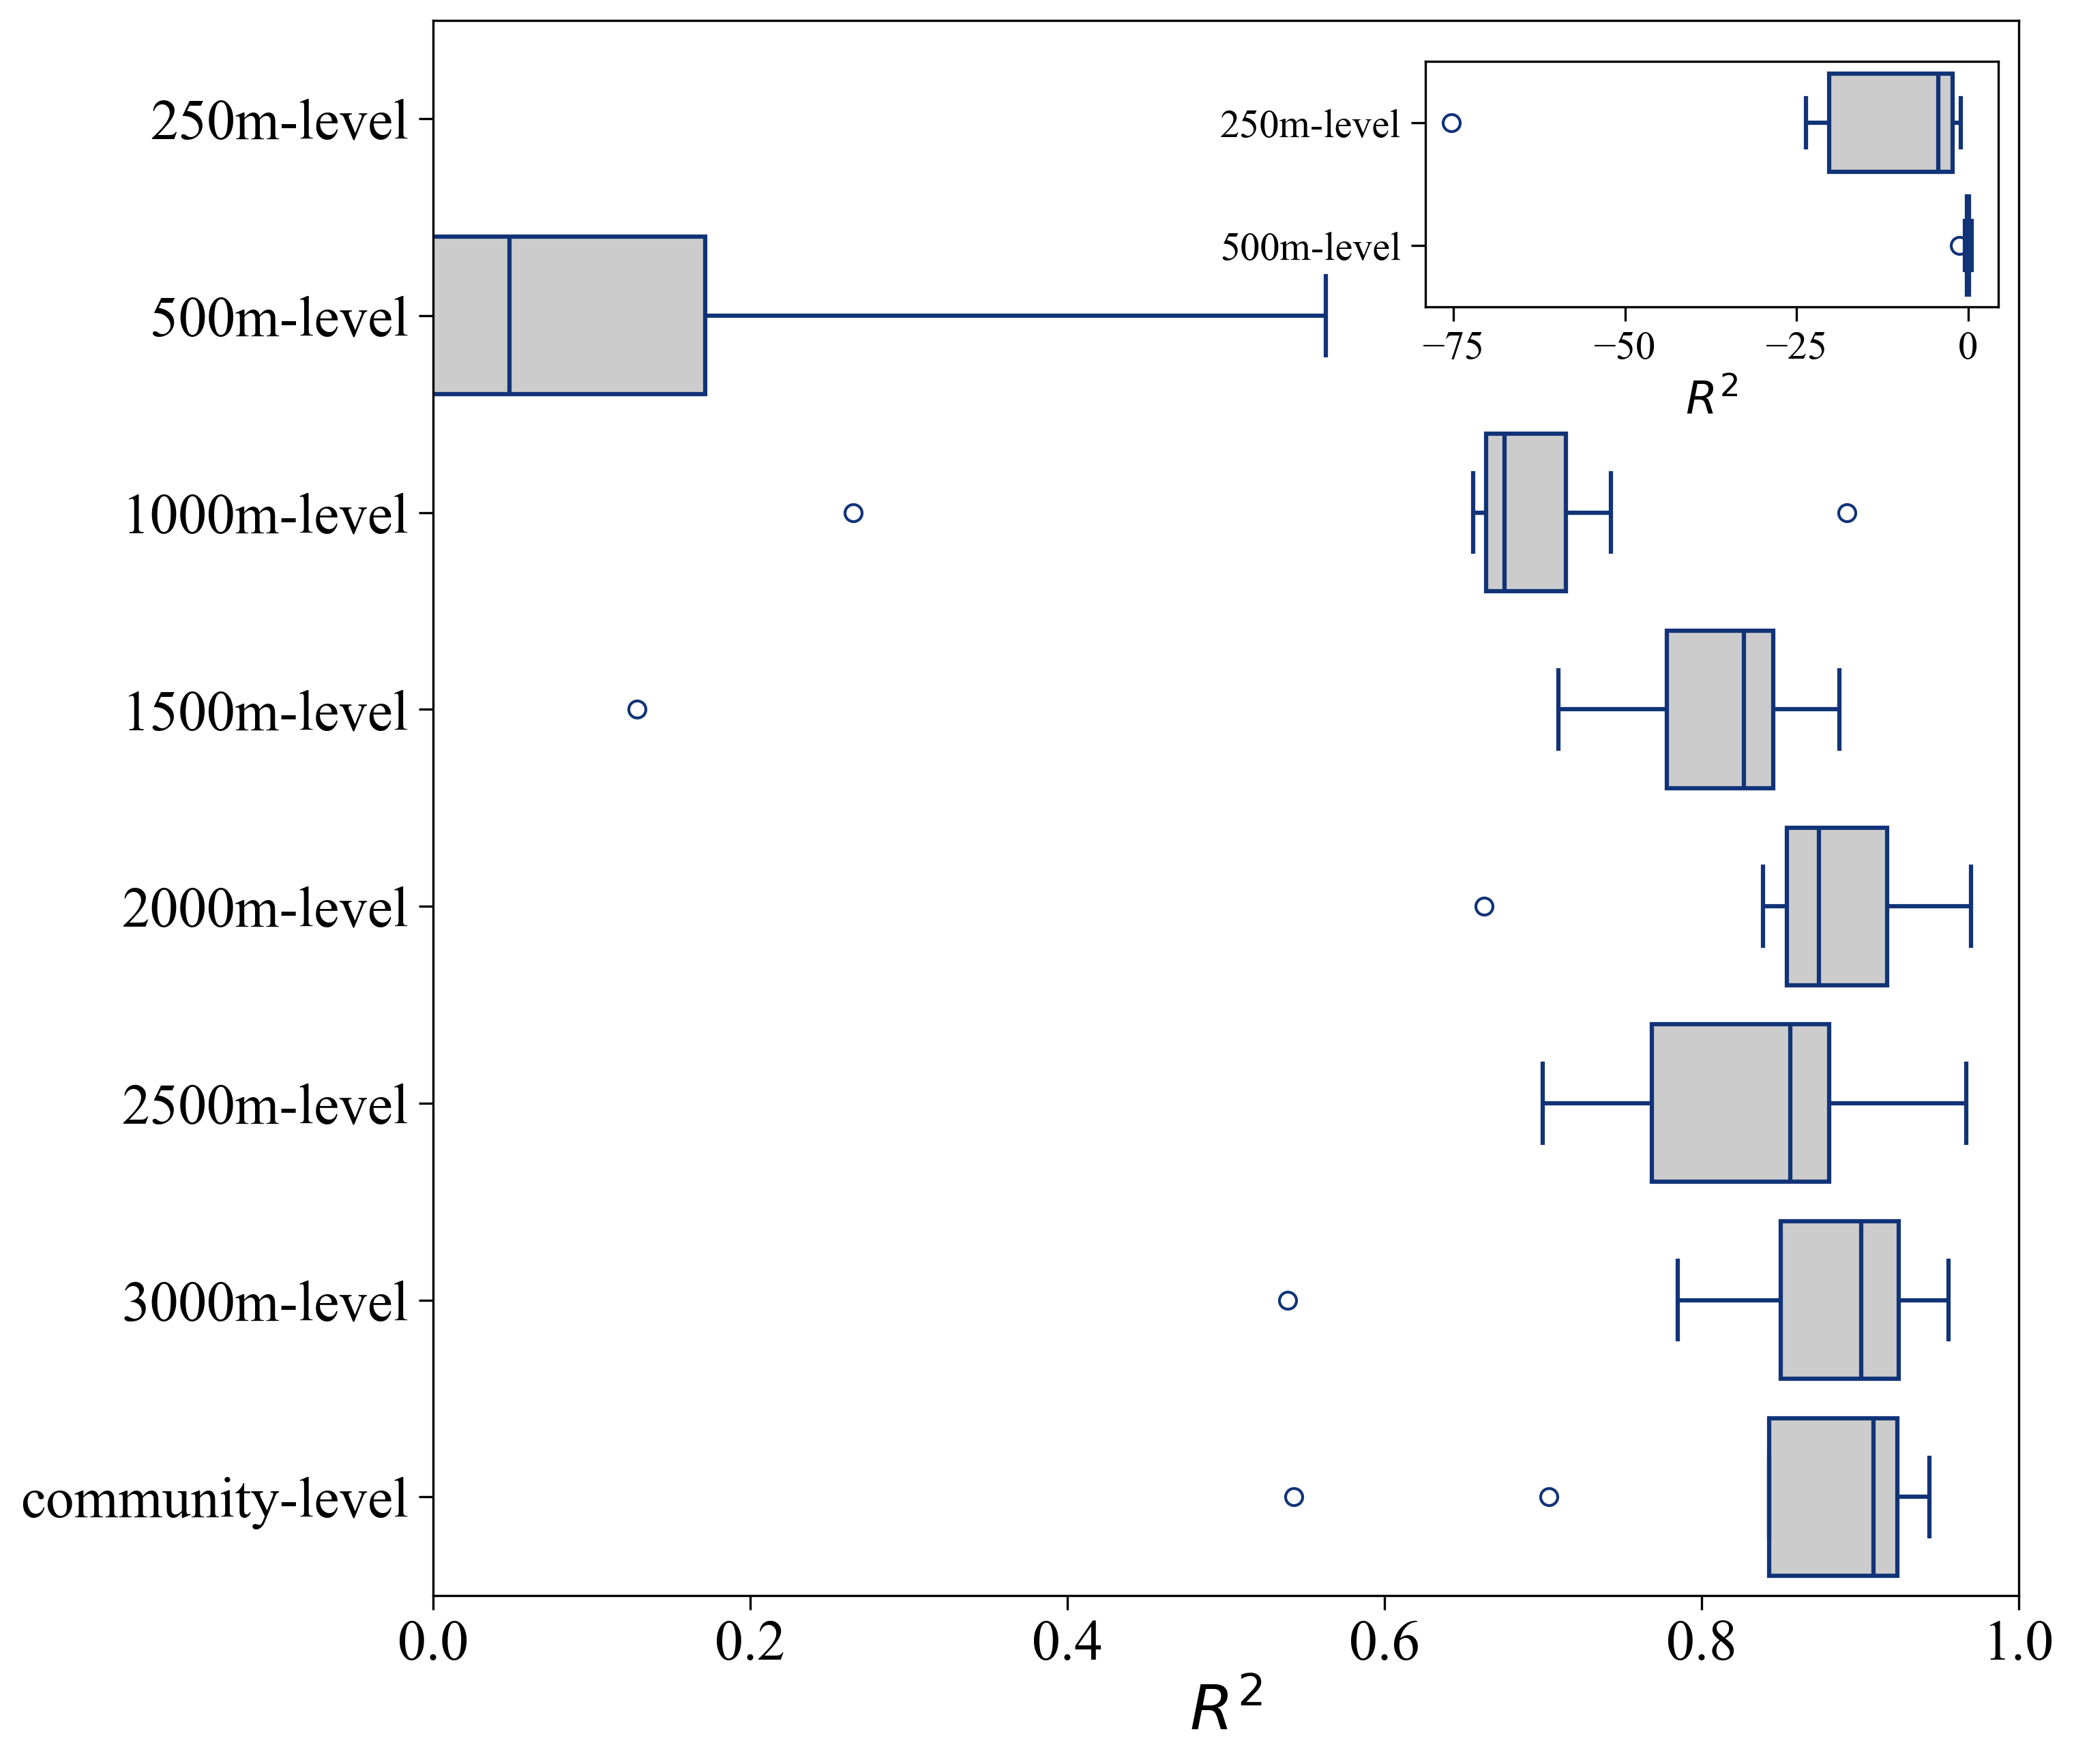

In [31]:
fig, ax = plt.subplots(figsize=(10,10),dpi=300)
sns.boxplot(y=df4['unit'],  x=df4['r2'],color='0.8',linecolor="#137", linewidth=1.5, ax=ax)
ax.set_xlim(0,1)
ax.set_xlabel('$R^2$', fontsize=22)
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', length=5, color='k', labelsize=20)


# v_median = df4.groupby(by='unit').median()['r2']
# v_median = v_median.round(3)
# label_name = ['grid250-level', 'grid500-level', 'grid1000-level', 'grid1500-level',
#               'grid2000-level', 'grid2500-level', 'grid3000-level', 'community-level']
# for i in range(0,8):
#     ax.text(0+0.01,i+0.05, f"Median = {v_median[label_name[i]]}", fontsize=18, ha='left', va='top')
    

ax2 = fig.add_subplot((0.61,0.74,0.28,0.12))
df_sub = df4[df4['unit'].isin(['250m-level', '500m-level'])]
sns.boxplot(y=df_sub['unit'],  x=df_sub['r2'],color='0.8',linecolor="#137", linewidth=1.5, ax=ax2)
ax2.set_xlabel('$R^2$', fontsize=16)
ax2.set_ylabel('')
ax2.tick_params(axis='both', which='major', length=5, color='k', labelsize=14)
plt.savefig(f'./result/png/model-performace/park4.png', dpi=300, bbox_inches='tight')

## tab

In [32]:
df1

,name,file_path,num_train,num_test,r2,mse,learning_rate,max_depth,n_estimators,unit,ts,label
0,df_1,df_1_modeling_od_walk_grid250_od_900.joblib,596,149,-3.482,1.230,0.16,2,67,250m-level,900.joblib,1
1,df_1,df_1_modeling_od_walk_grid500_od_900.joblib,947,237,-1.527,2.696,0.09,3,103,500m-level,900.joblib,2
2,df_1,df_1_modeling_od_walk_grid1000_od_900.joblib,991,248,0.173,4.851,0.04,5,228,1000m-level,900.joblib,3
3,df_1,df_1_modeling_od_walk_grid1500_od_900.joblib,1065,267,0.595,3.985,0.04,7,226,1500m-level,900.joblib,4
4,df_1,df_1_modeling_od_walk_grid2000_od_900.joblib,1641,411,0.530,7.436,0.12,5,99,2000m-level,900.joblib,5
...,...,...,...,...,...,...,...,...,...,...,...,...
59,df_1,df_1_modeling_od_nav_grid1500_od_1800.joblib,10976,2745,0.592,4.805,0.17,7,173,1500m-level,1800.joblib,4
60,df_1,df_1_modeling_od_nav_grid2000_od_1800.joblib,10691,2673,0.783,3.234,0.12,10,107,2000m-level,1800.joblib,5
61,df_1,df_1_modeling_od_nav_grid2500_od_1800.joblib,11270,2818,0.838,3.967,0.13,8,244,2500m-level,1800.joblib,6
62,df_1,df_1_modeling_od_nav_grid3000_od_1800.joblib,11519,2880,0.750,3.713,0.04,10,260,3000m-level,1800.joblib,7


In [33]:
grid_types

{1: 'grid250-level',
 2: 'grid500-level',
 3: 'grid1000-level',
 4: 'grid1500-level',
 5: 'grid2000-level',
 6: 'grid2500-level',
 7: 'grid3000-level',
 8: 'community-level'}

In [34]:
# result1 = df1.groupby(by='label')[['r2']].agg(['mean', 'median', 'std']).reset_index()
result1 = df1.groupby(by='label')[['r2']].median().reset_index()
result1['label'] = result1['label'].map(grid_types)
result1 = result1.set_index('label')
result1 = result1.round(3)
result1

,r2
label,
grid250-level,-7.910
grid500-level,-1.192
grid1000-level,0.184
grid1500-level,0.603
grid2000-level,0.738
grid2500-level,0.711
grid3000-level,0.782
community-level,0.798


In [35]:
result2 = df2.groupby(by='label')[['r2']].median().reset_index()
result2['label'] = result2['label'].map(grid_types)
result2 = result2.round(3)
result2 = result2.set_index('label')

result3 = df3.groupby(by='label')[['r2']].median().reset_index()
result3['label'] = result3['label'].map(grid_types)
result3 = result3.round(3)
result3 = result3.set_index('label')

result4 = df4.groupby(by='label')[['r2']].median().reset_index()
result4['label'] = result4['label'].map(grid_types)
result4 = result4.round(3)
result4 = result4.set_index('label')

In [36]:
result = pd.concat([result1,result2,result3,result4], axis=1)
result = result.reset_index()
result

,label,r2,r2,r2,r2
0,grid250-level,-7.910,-1.880,-5.084,-4.324
1,grid500-level,-1.192,0.209,0.047,0.048
2,grid1000-level,0.184,0.659,0.648,0.676
3,grid1500-level,0.603,0.730,0.794,0.827
4,grid2000-level,0.738,0.825,0.827,0.874
5,grid2500-level,0.711,0.814,0.868,0.856
6,grid3000-level,0.782,0.849,0.854,0.901
7,community-level,0.798,0.874,0.867,0.909


In [37]:
result.columns=['label','Service provided by one park', 'Service provided by two parks',
                'Service provided by three parks', 'Service provided by four parks']

In [38]:
result

,label,Service provided by one park,Service provided by two parks,Service provided by three parks,Service provided by four parks
0,grid250-level,-7.910,-1.880,-5.084,-4.324
1,grid500-level,-1.192,0.209,0.047,0.048
2,grid1000-level,0.184,0.659,0.648,0.676
3,grid1500-level,0.603,0.730,0.794,0.827
4,grid2000-level,0.738,0.825,0.827,0.874
5,grid2500-level,0.711,0.814,0.868,0.856
6,grid3000-level,0.782,0.849,0.854,0.901
7,community-level,0.798,0.874,0.867,0.909


In [39]:
result.to_excel('./result/Maup-sensitivity.xlsx')